In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.simplefilter(action='ignore')

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [5]:
df = pd.read_csv('Math_preprocessed.csv')

In [8]:
df.head()

,Medu,Fedu,studytime,famrel,school_GP,sex_M,address_U,famsize_LE3,Pstatus_A,Mjob_health,...,guardian_father,schoolsup_no,famsup_no,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_no,Grade
0,1.00,1.00,0.333333,0.75,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,5.666667
1,0.25,0.25,0.333333,1.00,1,0,1,0,0,0,...,1,1,0,0,0,0,1,1,1,5.333333
2,0.25,0.25,0.333333,0.75,1,0,1,1,0,0,...,0,0,1,1,0,1,1,1,1,8.333333
3,1.00,0.50,0.666667,0.50,1,0,1,0,0,1,...,0,1,0,1,1,1,1,1,0,14.666667
4,0.75,0.75,0.333333,0.75,1,0,1,0,0,0,...,1,1,0,1,0,1,1,0,1,8.666667


<Axes: >

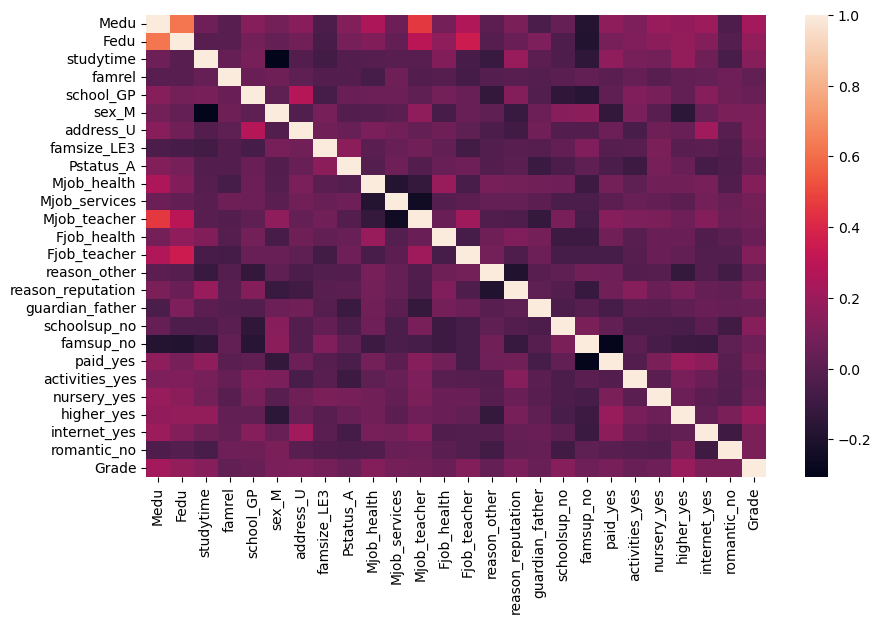

In [6]:
corr_df = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_df)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [49]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Medu,18.021575
1,Fedu,12.192995
2,studytime,3.146521
3,famrel,10.690793
4,school_GP,9.637101
5,sex_M,2.398549
6,address_U,5.405391
7,famsize_LE3,1.545897
8,Pstatus_A,1.245236
9,Mjob_health,1.545499


In [50]:
var_inf= pd.DataFrame(calc_vif(X))

In [51]:
drop_cols = var_inf.loc[var_inf['VIF']>7]['variables']
t=list(drop_cols)

In [52]:
t

['Medu', 'Fedu', 'famrel', 'school_GP', 'schoolsup_no', 'higher_yes']

In [98]:
df1 = df.drop([t[0],t[1],t[2],t[3],t[4],t[5]],axis = 1)
df1.head()

,studytime,sex_M,address_U,famsize_LE3,Pstatus_A,Mjob_health,Mjob_services,Mjob_teacher,Fjob_health,Fjob_teacher,reason_other,reason_reputation,guardian_father,famsup_no,paid_yes,activities_yes,nursery_yes,internet_yes,romantic_no,Grade
0,0.333333,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,5.666667
1,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,5.333333
2,0.333333,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,8.333333
3,0.666667,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,14.666667
4,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,8.666667


In [99]:
X = df1.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,studytime,2.804810
1,sex_M,2.201340
2,address_U,4.492624
3,famsize_LE3,1.514097
4,Pstatus_A,1.192325
5,Mjob_health,1.313987
6,Mjob_services,1.636123
7,Mjob_teacher,1.604221
8,Fjob_health,1.166196
9,Fjob_teacher,1.199716


In [100]:
#Identify input and target columns
input_cols,target_cols=df1.columns[:-1],df1.columns[-1]
input_df,targets=df1[input_cols].copy(),df1[target_cols].copy()

In [6]:
#X_train,X_test,y_train,y_test=train_test_split(input_df,targets,test_size=0.10,random_state=42)

In [101]:
#y_train.mean()
input_df

,studytime,sex_M,address_U,famsize_LE3,Pstatus_A,Mjob_health,Mjob_services,Mjob_teacher,Fjob_health,Fjob_teacher,reason_other,reason_reputation,guardian_father,famsup_no,paid_yes,activities_yes,nursery_yes,internet_yes,romantic_no
0,0.333333,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1
1,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0.333333,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1
3,0.666667,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0
4,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.333333,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1
391,0.000000,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
392,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
393,0.000000,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1


In [102]:
#Linear Regression
from sklearn.metrics import r2_score
scores= [] #to store r squared
mse_list= [] #to store RMSE
mae_list = []
#r2 = []
model1 = LinearRegression()
cv = KFold(n_splits=4, random_state=42, shuffle=True)
for train_index, test_index in cv.split(input_df):
    X_train, X_test, y_train, y_test = input_df.loc[train_index], input_df.loc[test_index], targets.loc[train_index], targets.loc[test_index]
    model1.fit(X_train, y_train)
    y_predict = model1.predict(X_test)
    scores.append(model1.score(X_test, y_test))
    #r2.append(r2_score(y_test, y_predict))
    mse_fold = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_fold)
    mae_fold = mean_absolute_error(y_test, y_predict)
    mae_list.append(mae_fold)
print('MSE',np.mean(mse_list))
print('MAE',np.mean(mae_list))
print('R-squared',np.mean(scores))
#print(np.mean(r2))

MSE 13.05839019388289
MAE 2.9311167217233893
R-squared 0.026277499341682276


In [103]:
#SVR
scores= [] #to store r squared
mse_list= [] #to store RMSE
mae_list = []
model2 = LinearSVR()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(input_df):
    X_train, X_test, y_train, y_test = input_df.loc[train_index], input_df.loc[test_index], targets.loc[train_index], targets.loc[test_index]
    model2.fit(X_train, y_train)
    y_predict = model2.predict(X_test)
    scores.append(model2.score(X_test, y_test))
    mse_fold = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_fold)
    mae_fold = mean_absolute_error(y_test, y_predict)
    mae_list.append(mae_fold)
print('MSE',np.mean(mse_list))
print('MAE',np.mean(mae_list))
print('R-squared',np.mean(scores))

MSE 13.413584724261614
MAE 2.9746424474116173
R-squared -0.000290415541357758


In [105]:
scores= [] #to store r squared
mse_list= [] #to store RMSE
mae_list = []
model4=DecisionTreeRegressor()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(input_df):
    X_train, X_test, y_train, y_test = input_df.loc[train_index], input_df.loc[test_index], targets.loc[train_index], targets.loc[test_index]
    model4.fit(X_train, y_train)
    y_predict = model4.predict(X_test)
    scores.append(model4.score(X_test, y_test))
    mse_fold = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_fold)
    mae_fold = mean_absolute_error(y_test, y_predict)
    mae_list.append(mae_fold)
print('MSE',np.mean(mse_list))
print('MAE',np.mean(mae_list))
print('R-squared',np.mean(scores))

MSE 26.328871698276874
MAE 4.186075949302532
R-squared -0.9885072451722724


In [106]:
scores= [] #to store r squared
mse_list= [] #to store RMSE
mae_list = []
model5=XGBRegressor()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(input_df):
    X_train, X_test, y_train, y_test = input_df.loc[train_index], input_df.loc[test_index], targets.loc[train_index], targets.loc[test_index]
    model5.fit(X_train, y_train)
    y_predict = model5.predict(X_test)
    scores.append(model5.score(X_test, y_test))
    mse_fold = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_fold)
    mae_fold = mean_absolute_error(y_test, y_predict)
    mae_list.append(mae_fold)
print('MSE',np.mean(mse_list))
print('MAE',np.mean(mae_list))
print('R-squared',np.mean(scores))

MSE 18.91428987907213
MAE 3.4465139295027507
R-squared -0.42269062665193485


In [107]:
scores= [] #to store r squared
mse_list= [] #to store RMSE
mae_list = []
model6=RandomForestRegressor()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(input_df):
    X_train, X_test, y_train, y_test = input_df.loc[train_index], input_df.loc[test_index], targets.loc[train_index], targets.loc[test_index]
    model6.fit(X_train, y_train)
    y_predict = model6.predict(X_test)
    scores.append(model6.score(X_test, y_test))
    mse_fold = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_fold)
    mae_fold = mean_absolute_error(y_test, y_predict)
    mae_list.append(mae_fold)
print('MSE',np.mean(mse_list))
print('MAE',np.mean(mae_list))
print('R-squared',np.mean(scores))

MSE 13.652215284687049
MAE 2.966616562753769
R-squared -0.016352887121721803


In [108]:
scores= [] #to store r squared
mse_list= [] #to store RMSE
mae_list = []
model7=AdaBoostRegressor()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(input_df):
    X_train, X_test, y_train, y_test = input_df.loc[train_index], input_df.loc[test_index], targets.loc[train_index], targets.loc[test_index]
    model7.fit(X_train, y_train)
    y_predict = model7.predict(X_test)
    scores.append(model7.score(X_test, y_test))
    mse_fold = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_fold)
    mae_fold = mean_absolute_error(y_test, y_predict)
    mae_list.append(mae_fold)
print('MSE',np.mean(mse_list))
print('MAE',np.mean(mae_list))
print('R-squared',np.mean(scores))

MSE 13.928979590205813
MAE 2.991857097108147
R-squared -0.03297054926787786


In [109]:
scores= [] #to store r squared
mse_list= [] #to store RMSE
mae_list = []
model8=GradientBoostingRegressor()
cv = KFold(n_splits=20, random_state=42, shuffle=True)
for train_index, test_index in cv.split(input_df):
    X_train, X_test, y_train, y_test = input_df.loc[train_index], input_df.loc[test_index], targets.loc[train_index], targets.loc[test_index]
    model8.fit(X_train, y_train)
    y_predict = model8.predict(X_test)
    scores.append(model8.score(X_test, y_test))
    mse_fold = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_fold)
    mae_fold = mean_absolute_error(y_test, y_predict)
    mae_list.append(mae_fold)
print('MSE',np.mean(mse_list))
print('MAE',np.mean(mae_list))
print('R-squared',np.mean(scores))

MSE 13.374467865778048
MAE 2.9463426693497534
R-squared -0.06097601746537917


Random forest regressor performs the best for this dataset.